In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving resampled_data.csv to resampled_data.csv


In [ ]:
df = pd.read_csv('resampled_data.csv')

In [ ]:
print(df.head())
print(df.info())

        age  sex  nationality  current_status
0 -0.140413    0           10               0
1  0.167584    1           10               1
2  0.988908    0           10               0
3  0.372915    1           15               0
4  1.091574    1           15               1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11594 entries, 0 to 11593
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             11594 non-null  float64
 1   sex             11594 non-null  int64  
 2   nationality     11594 non-null  int64  
 3   current_status  11594 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 362.4 KB
None


In [ ]:
df.dropna(inplace = True)

In [ ]:
df = pd.get_dummies(df, drop_first = True)

In [ ]:
numeric_features = ['age', 'sex', 'nationality', 'current_status']
X = df[numeric_features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df['Cluster'] = kmeans.labels_

In [ ]:
inertia = []
cluster_range = range(1, 21)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [ ]:
print("Inertia values for different cluster counts:")
for n_clusters, value in zip(cluster_range, inertia):
    print(f'Number of clusters: {n_clusters}, Inertia: {value}')

Inertia values for different cluster counts:
Number of clusters: 1, Inertia: 46375.99999999957
Number of clusters: 2, Inertia: 28395.874787584904
Number of clusters: 3, Inertia: 22318.82838322862
Number of clusters: 4, Inertia: 17037.224543102213
Number of clusters: 5, Inertia: 12060.178727973509
Number of clusters: 6, Inertia: 10341.298227371246
Number of clusters: 7, Inertia: 9533.726621272144
Number of clusters: 8, Inertia: 7548.552954905673
Number of clusters: 9, Inertia: 6284.447115039418
Number of clusters: 10, Inertia: 5495.122750840878
Number of clusters: 11, Inertia: 4779.8059993762445
Number of clusters: 12, Inertia: 4441.803636616614
Number of clusters: 13, Inertia: 3908.8397481936827
Number of clusters: 14, Inertia: 3734.7333315334818
Number of clusters: 15, Inertia: 3182.2360644089367
Number of clusters: 16, Inertia: 3019.2066894385835
Number of clusters: 17, Inertia: 2881.353812886119
Number of clusters: 18, Inertia: 2614.703300008743
Number of clusters: 19, Inertia: 2395

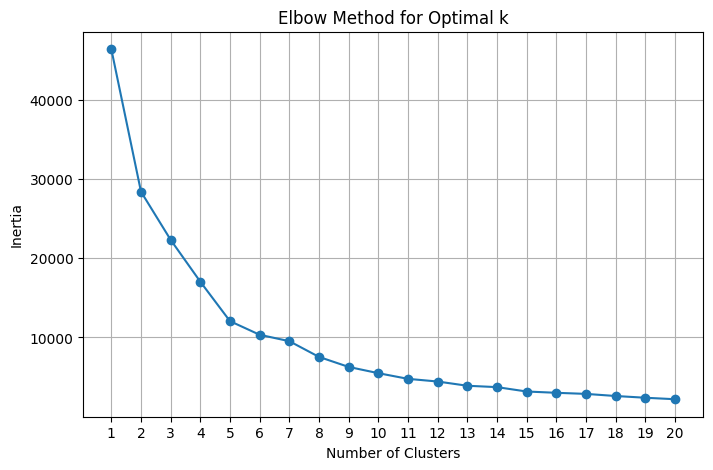

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(cluster_range)
plt.grid()
plt.show()